<a href="https://colab.research.google.com/github/FGalvao77/Rede-neural-convolucional-para-classificacao-de-imagens-com-Python-TensorFlow-e-Keras/blob/main/Rede_neural_convolucional_para_classifica%C3%A7%C3%A3o_de_imagens_com_Python%2C_TensorFlow_e_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rede neural convolucional para classificação de imagens com Python, TensorFlow e Keras**

---



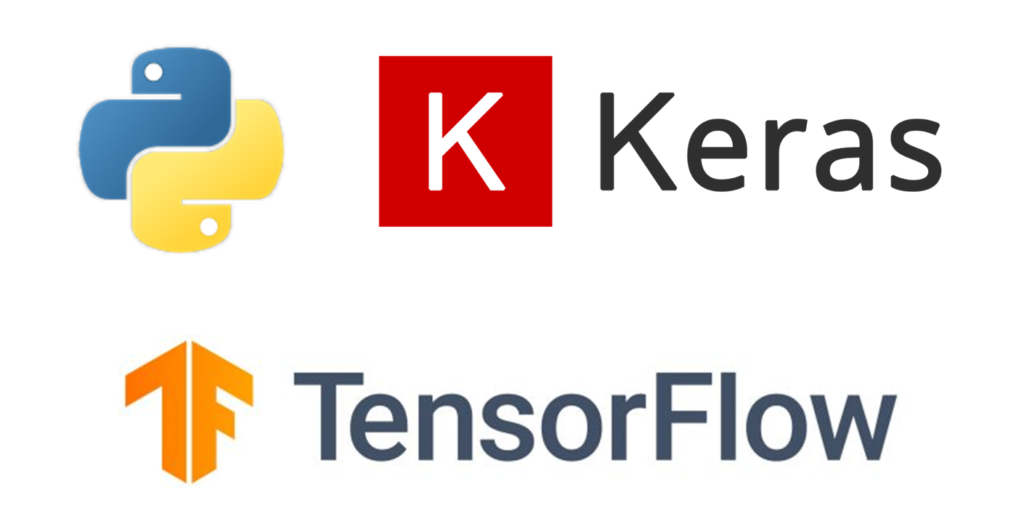

## **Introdução**

No aprendizado profundo, uma rede neural convolucional é uma classe de redes neurais profundas que têm sido usadas com grande sucesso em tarefas de visão computacional, como classificação de imagens, detecção de objetos, segmentação de imagens, ...

Os neurônios em uma camada convolucional não estão totalmente conectados a cada pixel na imagem de entrada, como em uma rede neural tradicional. Em vez disso, eles são conectados a um pequeno retângulo de pixels na imagem de entrada. 

Por sua vez, cada neurônio da segunda camada convolucional está conectado apenas a outros neurônios localizados em uma região específica da primeira camada.

Com essa arquitetura, o modelo só precisa se concentrar nos pequenos detalhes da primeira camada oculta, como bordas, e depois montá-los em recursos mais elaborados na segunda camada e assim por diante.

Além disso, isso fará com que a rede neural convolucional tenha muito menos parâmetros do que uma rede totalmente conectada, útil para processar imagens de grande porte.

A imagem abaixo mostra uma arquitetura típica da CNN:

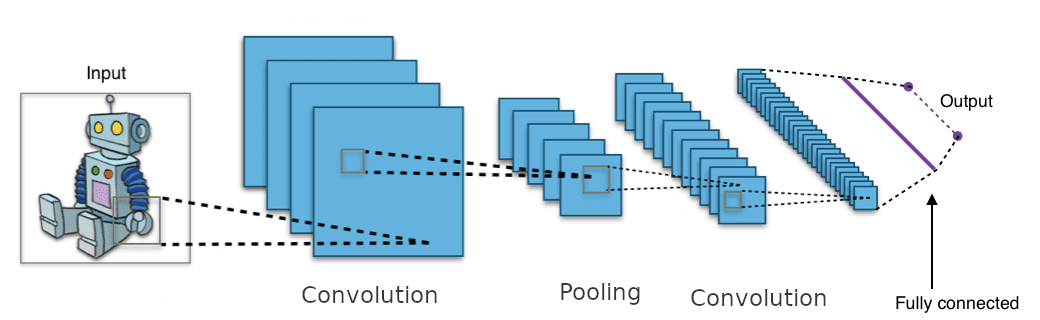

- Esta imagem é um derivado de ["Arquivo: cnn.png típico"](https://commons.wikimedia.org/w/index.php?curid=45679374) por [Aphex34](https://commons.wikimedia.org/w/index.php?title=User:Aphex34&action=edit&redlink=1), que é licenciado sob [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0?ref=ccsearch&atype=rich)

Neste tutorial, veremos como usar uma rede neural convolucional para classificar imagens dos conjuntos de dados Fashion `MNIST` e `CIFAR-10`.

### **Carregando o Fashion MMIST**

Por conveniência, vamos carregar o conjunto de dados usando o módulo `tf.keras.datasets`.

In [40]:
# importando a biblioteca
from tensorflow import keras

In [41]:
# carregando as imagens
fashion_mnist = keras.datasets.fashion_mnist

In [42]:
# instanciando as imagens
(X_full, y_full), (X_test, y_test) = fashion_mnist.load_data()

In [43]:
# visualizando as dimensões das variáveis
X_full.shape, y_full.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [44]:
# particionando os dados das imagens em validação, treino e teste
X_valid, X_train = X_full[:5_000] / 255.0, X_full[5_000:] / 255.0
y_valid, y_train = y_full[:5_000], y_full[5_000:]
X_test = X_test / 255.0

In [45]:
# instanciando as classes das imagens
class_images = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
                'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Temos que remodelar os dados antes de alimentá-los na rede.

In [36]:
# redimensionando o tamanho das imagens
X_train = X_train.reshape((55_000, 28, 28, 1))
X_valid  = X_valid.reshape((5_000, 28, 28, 1))
X_test = X_test.reshape((10_000, 28, 28, 1))

#### **Construindo uma Rede Neural Convolucional Simples**

A arquitetura comum de uma rede neural convolucional (CNN) geralmente usa uma camada convolucional seguida por uma camada de pooling e, em seguida, repete a operação várias vezes. Uma rede neural feedforward é adicionada em cima dela, composta de algumas camadas densamente conectadas e a última camada produz as previsões.

As camadas de pool são usadas para reduzir as dimensões da imagem de entrada e, assim, reduzir o número de parâmetros a serem aprendidos, a carga computacional e limitar o risco de sobreajuste.

Abaixo você pode ver a aparência de uma rede neural convolucional básica.

In [12]:
# importando as bibliotecas
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [13]:
# construindo o modelo da rede neural
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax'),
])

In [14]:
# visualizando a rede neural
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

Uma rede neural convolucional (CNN) toma como entrada um tensor de forma (altura da imagem, largura da imagem, canais da imagem) sem a dimensão do lote.

Para o Fashion MNIST, as imagens são em tons de cinza (image_channels = 1) imagens de 28 × 28 pixels.

A primeira camada `Conv2D` tem 32 mapas de filtro, cada um 3 x 3, usando o " mesmo " preenchimento e aplicando a função de ativação `ReLu` às suas saídas. É comum dobrar o número de mapas de recursos após cada camada `MaxPooling2D`.

A camada `MaxPooling2D` usa um tamanho de pool de 2, que dividirá as dimensões espaciais por 2.

Aqui está o resumo do modelo.

É possível ver a partir do modelo uma síntese que a saída de cada `Conv2D` e `MaxPooling2D` camada é um tensor _3D_ (sem o tamanho do lote), enquanto uma camada densamente ligado espera que um tensor _1D_.

É por isso que precisamos nivelar as saídas 3D para 1D (usando a camada `Flatten`) antes de adicionar camadas `Dense` no topo. A camada `Flatten` assume a forma da camada anterior (None, 3, 3, 128) e multiplica as dimensões (3 x 3 x 128 = 1152).

A primeira camada `Conv2D` acima tem uma forma de saída de (None, 28, 28, 32). A primeira dimensão refere-se ao tamanho do lote.

O modelo não sabe o tamanho do lote, pois não o especificamos, então ele é definido como `None`.

Quando o treinamento iniciar, se o tamanho do lote não for especificado, o  método de ajuste (`fit`) o definirá para 32.

Agora, vamos dar uma olhada no treinamento do modelo.

In [15]:
# compilando o modelo
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), 
              optimizer=keras.optimizers.SGD(), 
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [16]:
# iniciando o treinamento do modelo da rede neural
epochs = 20

history = model.fit(X_train, y_train, epochs=epochs,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 101s 58ms/step - loss: 0.9559 - sparse_categorical_accuracy: 0.6618 - val_loss: 0.7087 - val_sparse_categorical_accuracy: 0.7276
Epoch 2/20
1719/1719 [==============================] - 101s 59ms/step - loss: 0.5513 - sparse_categorical_accuracy: 0.7977 - val_loss: 0.4560 - val_sparse_categorical_accuracy: 0.8406
Epoch 3/20
1719/1719 [==============================] - 101s 59ms/step - loss: 0.4573 - sparse_categorical_accuracy: 0.8329 - val_loss: 0.4356 - val_sparse_categorical_accuracy: 0.8404
Epoch 4/20
1719/1719 [==============================] - 101s 59ms/step - loss: 0.4058 - sparse_categorical_accuracy: 0.8516 - val_loss: 0.4506 - val_sparse_categorical_accuracy: 0.8310
Epoch 5/20
1719/1719 [==============================] - 101s 59ms/step - loss: 0.3741 - sparse_categorical_accuracy: 0.8634 - val_loss: 0.3460 - val_sparse_categorical_accuracy: 0.8752
Epoch 6/20
1719/1719 [==============================] - 101s 59ms/step - lo

1719 representa as etapas que o modelo precisa realizar antes de completar 1 época. É assim que funciona: quando o treinamento começa, alimentamos as instâncias de treinamento para o modelo. O modelo processará instâncias pelo que chamamos de lotes .

Como eu disse acima, quando o tamanho do lote não for especificado, ele será automaticamente definido como 32. Assim, o modelo será alimentado com as instâncias de treinamento por lotes de 32 imagens cada uma com 32 x 32 pixels. 

Nosso conjunto de treinamento contém 55.000 imagens. Se fizermos as contas, temos 55.000 imagens que serão enviadas à rede por lotes de 32 imagens; quanto tempo vai demorar para a rede ver todas as imagens? 55.000 / 32 = 1718,75 etapas ~ 1719 etapas.

Vamos dar uma olhada na precisão agora. Conseguimos cerca de 90,5% de precisão no conjunto de validação após 20 épocas, enquanto obtivemos 88,5% com uma rede neural totalmente conectada; isso é uma melhoria relativa de 17%. Nada mal!

Você pode ver que o modelo começa a se ajustar um pouco (90,5% de precisão no conjunto de validação vs 92% de precisão no conjunto de treinamento), mas quero parar aqui com o Fashion MNIST e apresentar o conjunto de dados CIFAR-10 porque este conjunto de dados é mais desafiador e overfitting será nosso principal problema.

Você verá como a rede sobrecarregará os dados de treinamento e o que podemos fazer para combater o super ajuste.

### **Carregando CIFAR-10**

Novamente, por conveniência, usaremos tf.keras.datasets para carregar o conjunto de dados.

O conjunto de dados contém 60.000 imagens coloridas de 32x32 pixels em 10 classes. Existem 6000 imagens por aula. O conjunto de dados é dividido em um conjunto de treinamento de 50.000 imagens e um conjunto de teste de 10.000 imagens.

As classes no conjunto de dados são: airplane (avião), automobile (automóvel), bird (pássaro), cat (gato), deer(veado), dog (cahorro), frog (sapo), horse (cavalo), ship (navio), truck (caminhão).

Vamos criar uma lista que conterá os nomes dessas classes.

e, agora iremos carregar o conjunto de dados.

In [49]:
# instanciando as classes das imagens
class_images2 = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                 'dog', 'frog', 'horse', 'ship', 'truck']

In [50]:
# carregando o conjunto de dados
cifar10 = keras.datasets.cifar10

In [51]:
# instanciano o conjunto de dados 
(X_full, y_full), (X_test, y_test) = cifar10.load_data()

In [52]:
# visualizando as dimensões das variáveis
X_full.shape, y_full.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

Precisamos criar um conjunto de validação e remodelar o recurso de entrada.

In [53]:
# particionando os dados das imagens em validação, treino e teste
X_valid, X_train = X_full[:5_000] / 255.0, X_full[5_000:] / 255.0
y_valid, y_train = y_full[:5_000], y_full[5_000:]
X_test = X_test / 255.0

# redimensionando o tamanho das imagens
X_train = X_train.reshape((45_000, 32, 32, 3))
X_valid = X_valid.reshape((5_000, 32, 32, 3))
X_test = X_test.reshape((10_000, 32, 32, 3))

Vamos plotar algumas imagens do conjunto de treinamento com seus rótulos.

In [54]:
# importando a biblioteca
import matplotlib.pyplot as plt

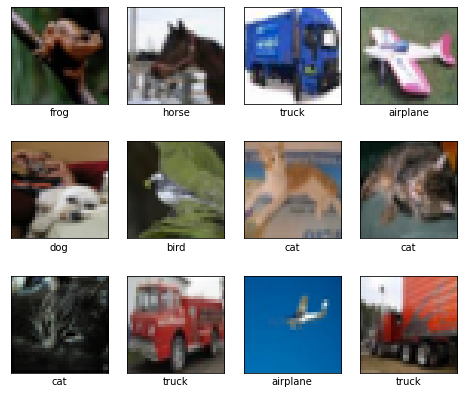

In [56]:
# plotando 12 imagens de amostras
plt.figure(figsize=(8, 7))

for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])
    plt.xlabel(class_images2[y_train[i][0]])
plt.show();

#### **Construindo o modelo CNN**

Seguiremos a mesma estrutura geral acima quando abordamos o conjunto de dados _Fashion MNIST_: a rede neural convolucional será uma pilha de camadas `Conv2D` e `MaxPooling2d` alteradas. Em seguida, uma rede neural `feedforward` será adicionada no topo.

Mas, como o problema é mais complexo e desafiador, aprofundaremos a rede neural.

In [57]:
# construindo uma rede neural com "feedforward"
model = Sequential()

model.add(Conv2D(32, (3, 3), activation = 'relu', 
                 padding = 'same', input_shape =(32, 32, 3)))

model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation = 'relu', 
                 padding='same'))

model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation = 'relu', 
                 padding = 'same'))

model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation = 'relu', 
                 padding = 'same'))

model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

#### **Compilando e treinando o modelo**

Agora podemos compilar o modelo usando a função de perda `"sparse_categorical_crossentropy"` e o algoritmo de descida gradiente estocástico (`"sgd "`) para o otimizador.

In [58]:
# instanciando o compilador do modelo 
# e definindo a função de perda, o otimizador e a métrica de avaliação   
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',   
              metrics = ['accuracy'])

Agora podemos começar a treinar como fizemos com o Fashion MNIST. 

In [59]:
# treinando o modelo
epochs = 25

history = model.fit(X_train, y_train, epochs = epochs,
                    validation_data = (X_valid, y_valid))

Epoch 1/25
1407/1407 [==============================] - 162s 115ms/step - loss: 2.1413 - accuracy: 0.2088 - val_loss: 2.1756 - val_accuracy: 0.2296
Epoch 2/25
1407/1407 [==============================] - 161s 115ms/step - loss: 1.7927 - accuracy: 0.3501 - val_loss: 1.7641 - val_accuracy: 0.3732
Epoch 3/25
1407/1407 [==============================] - 164s 117ms/step - loss: 1.5406 - accuracy: 0.4393 - val_loss: 1.4960 - val_accuracy: 0.4468
Epoch 4/25
1407/1407 [==============================] - 161s 115ms/step - loss: 1.3932 - accuracy: 0.4934 - val_loss: 1.3398 - val_accuracy: 0.5114
Epoch 5/25
1407/1407 [==============================] - 162s 115ms/step - loss: 1.2799 - accuracy: 0.5384 - val_loss: 1.4181 - val_accuracy: 0.4834
Epoch 6/25
1407/1407 [==============================] - 161s 115ms/step - loss: 1.1829 - accuracy: 0.5773 - val_loss: 1.2702 - val_accuracy: 0.5526
Epoch 7/25
1407/1407 [==============================] - 161s 115ms/step - loss: 1.0905 - accuracy: 0.6113 - val_

#### **Visualizando os resultados**

Nas imagens abaixo você pode ver a precisão e a perda do modelo no conjunto de treinamento e validação.

In [60]:
# importando a biblioteca
import matplotlib.pyplot as plt 

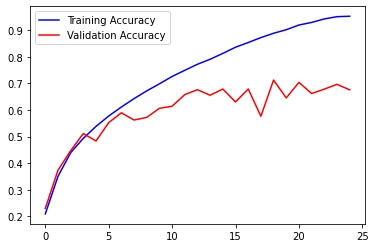

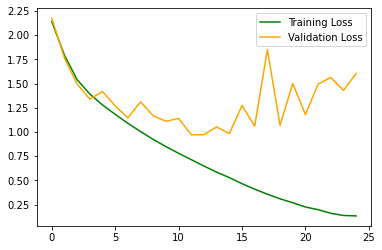

In [64]:
# criando uma função para realizar o plot das imagens
def plot_graph():
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.plot(range(epochs), acc, 'b', label = 'Training Accuracy')
    plt.plot(range(epochs), val_acc, 'r', label = 'Validation Accuracy')
    plt.legend()

    plt.figure()
   
    plt.plot(range(epochs), loss, 'g', label = 'Training Loss')
    plt.plot(range(epochs), val_loss, 'orange', label = 'Validation Loss')
    plt.legend()

    plt.show()

plot_graph();

Após 20 épocas, nossa precisão de validação não excedeu 70%, enquanto isso, nossa precisão de treinamento continua a subir para mais de 90%.

Como você pode ver, a modelo não teve um desempenho tão bom quanto no Fashion MNIST. Além disso, observe como há uma grande lacuna entre a precisão do treinamento e a precisão da validação: o modelo está claramente superando os dados de treinamento.



Existem várias técnicas que podem ajudar a mitigar o overfitting, como abandono, regularização, obtenção de mais dados, aumento de dados, etc.

Na próxima seção, veremos o que é aumento de dados e como aplicá-lo ao conjunto de dados.

#### **Aumento de dados**

O aumento de dados é uma técnica usada para aumentar artificialmente o tamanho de um conjunto de dados de treinamento. É o processo de geração de novos dados de treinamento com características semelhantes aos que já estão no conjunto de dados.

Isso é feito _aumentando_ os dados por meio de transformações aleatórias, como virar, cortar em tamanhos diferentes, girar em ângulos diferentes, etc.

Isso permitirá que o modelo seja mais tolerante a pequenas variações nas imagens e generalize melhor.

Existem várias maneiras de aplicar o aumento de dados:

- Podemos usar a classe `ImageDataGenerator`;
- Podemos usar as camadas de pré-processamento Keras;
- Podemos escrever nossos próprios pipelines de aumento de dados usando `tf.data` e `tf.image` (útil para um controle mais **preciso**)

Aqui, usaremos as camadas de pré-processamento Keras.

Existem duas maneiras de usar essas camadas de pré-processamento: podemos torná-las parte do modelo ou podemos aplicá-las diretamente ao conjunto de dados.

Para saber mais sobre as duas opções, leia a seção [Duas opções para usar as camadas de pré-processamento Keras](https://www.tensorflow.org/tutorials/images/data_augmentation#two_options_to_use_the_keras_preprocessing_layers) do   tutorial de [Aumento de dados](https://www.tensorflow.org/tutorials/images/data_augmentation).

No nosso caso, vamos usar a primeira opção: tornar as camadas de pré-processamento parte do modelo.

Vejamos um exemplo de aumento de dados usando as camadas de pré-processamento Keras.

In [65]:
# importando as bibliotecas
from tensorflow.keras.layers import RandomFlip
from tensorflow.keras.layers import RandomRotation
from tensorflow.keras.layers import RandomZoom
from tensorflow.keras.layers import RandomContrast

# para tensorflow versão 2.5 ou inferior, use o código abaixo
# from tensorflow.keras.layers.experimental.preprocessing import RandomFlip
# from tensorflow.keras.layers.experimental.preprocessing import RandomRotation
# from tensorflow.keras.layers.experimental.preprocessing import RandomZoom
# from tensorflow.keras.layers.experimental.preprocessing import RandomContrast

In [66]:
# instanciando o modelo para gerar aumento dos dados
data_augmentation = Sequential([
    RandomFlip('horizontal', input_shape=(32, 32, 3)),
    RandomContrast(0.2),
    RandomRotation(0.1),
    RandomZoom(0.1),
])

No ``TensorFlow 2.5 ou inferior``, algumas camadas ainda estão no módulo **experimental**, como a usada para aumento de dados. Portanto, se você estiver usando o TensorFlow versão 2.5 ou inferior, use o código comentado acima.

Você pode verificar a versão do TensorFlow usando os comandos abaixo.

In [67]:
# importando a biblioteca
import tensorflow as tf

# visualizando a versão do tensorflow em utilização
tf.__version__

'2.6.0'

Aqui está a imagem à qual aplicaremos o aumento de dados.

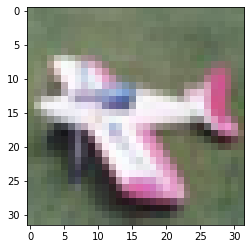

In [69]:
# importando a biblioteca
import matplotlib.pyplot as plt

# visualizando a imagem que será aplicada o modelo
plt.imshow(X_train[3]);

A imagem está um pouco confusa, isso porque o conjunto de dados contém imagens de 32 x 32 pixels cada.

Vamos ver como a imagem ficará depois de aplicar o aumento de dados.

No loop for abaixo, após cada iteração, uma transformação aleatória será aplicada à imagem antes de exibi-la.

In [70]:
# importando a biblioteca
import tensorflow as tf

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


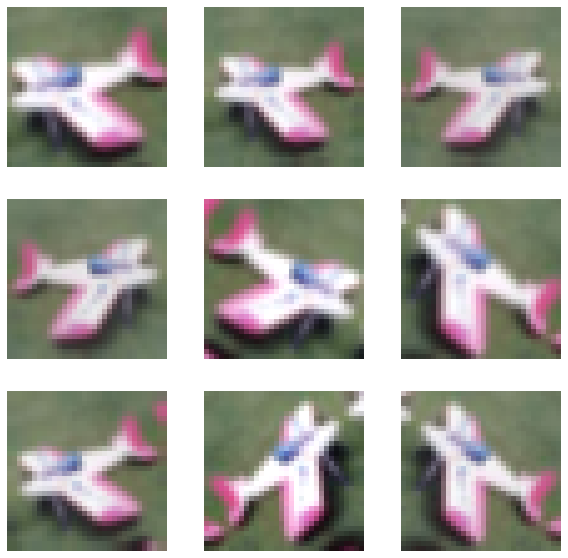

In [74]:
# adicione a imagem a um lote (batch)
# a forma da imagem será (1, 32, 32, 3)
image = tf.expand_dims(X_train[3], 0)

plt.figure(figsize=(10, 10))

for i in range(9):
    augmented_image = data_augmentation(image)
    plt.subplot(3, 3, i+1)
    plt.imshow(augmented_image[0])
    plt.axis('off')

Vamos criar uma nova rede neural convolucional usando as imagens aumentadas.

In [75]:
# instanciando a rede neural convolucional
model = keras.models.Sequential()

model.add(data_augmentation)
model.add(Conv2D(32, (3, 3), activation = 'relu', 
                 padding = 'same'))

model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation = 'relu',
                 padding = 'same'))

model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation = 'relu', 
                 padding = 'same'))

model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation = 'relu', 
                 padding = 'same'))

model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [76]:
# instanciando o compilador do modelo 
# e definindo a função de perda, o otimizador e a métrica de avaliação   
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',   
              metrics = ['accuracy'])

In [77]:
# treinando o modelo
epochs = 25

history = model.fit(X_train, y_train, epochs = epochs,
                    validation_data = (X_valid, y_valid))

Epoch 1/25
1407/1407 [==============================] - 177s 125ms/step - loss: 2.1833 - accuracy: 0.1967 - val_loss: 1.9805 - val_accuracy: 0.2640
Epoch 2/25
1407/1407 [==============================] - 175s 124ms/step - loss: 1.8873 - accuracy: 0.3211 - val_loss: 2.1321 - val_accuracy: 0.2534
Epoch 3/25
1407/1407 [==============================] - 179s 127ms/step - loss: 1.6919 - accuracy: 0.3913 - val_loss: 1.8476 - val_accuracy: 0.3568
Epoch 4/25
1407/1407 [==============================] - 176s 125ms/step - loss: 1.5826 - accuracy: 0.4304 - val_loss: 1.5579 - val_accuracy: 0.4418
Epoch 5/25
1407/1407 [==============================] - 176s 125ms/step - loss: 1.5034 - accuracy: 0.4574 - val_loss: 1.4884 - val_accuracy: 0.4574
Epoch 6/25
1407/1407 [==============================] - 176s 125ms/step - loss: 1.4363 - accuracy: 0.4837 - val_loss: 1.4472 - val_accuracy: 0.5036
Epoch 7/25
1407/1407 [==============================] - 176s 125ms/step - loss: 1.3830 - accuracy: 0.5032 - val_

Conseguimos cerca de 67% de precisão no conjunto de validação e cerca de 70,5% no conjunto de treinamento. Perdemos um pouco de precisão (obtemos 70,5% sem aumento de dados na validação), mas pelo menos há menos overfitting do que antes.

Você pode ver na imagem abaixo que a precisão do treinamento e da validação estão mais próximas uma da outra.

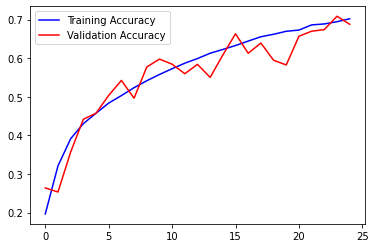

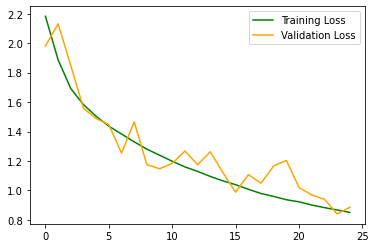

In [78]:
# plotando os gráficos
plot_graph();

#### **Avaliando o modelo**

Vamos terminar avaliando nosso modelo treinado no conjunto de teste.

In [79]:
# avaliando o modelo treinado no conjunto de teste
model.evaluate(X_test, y_test)

313/313 [==============================] - 9s 29ms/step - loss: 0.9167 - accuracy: 0.6827


[0.9166572093963623, 0.682699978351593]

### **Recursos e leituras adicionais**

Deixarei abaixo alguns bons recursos se você quiser aprender mais sobre redes neurais convolucionais e aumento de dados:

1.  Parte 2 Capítulo 5 do livro [Deep Learning with Python](https://www.amazon.com/Learning-Python-Second-Fran%C3%A7ois-Chollet/dp/1617296864?&linkCode=ll1&tag=123405e9-20&linkId=0dd2531a1dca8c5e4e1e3c8d0ef86d8c&language=en_US&ref_=as_li_ss_tl);
2.  Capítulo 14 do livro [Hands-On Machine Learning with Scikit-Learn, Keras e TensorFlow](https://www.amazon.com/dp/1492032646?_encoding=UTF8&pd_rd_w=4Lmw6&pf_rd_p=f0565570-f67b-4783-ab26-5a1f2c0bb3fd&pf_rd_r=6142TP1PGK5KWSTMXS5Y&pd_rd_r=f0a25120-c44a-417e-a8a6-8bcf416ba84a&pd_rd_wg=DK8y4&linkCode=ll1&tag=123405e9-20&linkId=c4822f57f9a7f8dc510d730e4af10b0d&language=en_US&ref_=as_li_ss_tl);
3.  Tutorial de [Rede Neural Convolucional (CNN)](https://www.tensorflow.org/tutorials/images/cnn) da plataforma TensorFlow e,
4.  Tutorial de [aumento de dados](https://www.tensorflow.org/tutorials/images/data_augmentation) da plataforma TensorFlow.

Se você quiser aprender aprendizado de máquina e aprendizado profundo do zero, eu pessoalmente recomendo o livro [Aprendizado de máquina prático com Scikit-Learn, Keras e TensorFlow](https://www.amazon.com/dp/1492032646?_encoding=UTF8&pd_rd_w=4Lmw6&pf_rd_p=f0565570-f67b-4783-ab26-5a1f2c0bb3fd&pf_rd_r=6142TP1PGK5KWSTMXS5Y&pd_rd_r=f0a25120-c44a-417e-a8a6-8bcf416ba84a&pd_rd_wg=DK8y4&linkCode=ll1&tag=123405e9-20&linkId=c4822f57f9a7f8dc510d730e4af10b0d&language=en_US&ref_=as_li_ss_tl).

### **Resumo**

No artigo de hoje, aprendemos como implementar e treinar uma rede neural convolucional simples usando Python, TensorFlow e Keras. Usamos os conjuntos de dados _Fashion MNIST_ e _CIFAR-10_.

Nossa rede neural convolucional simples atingiu `90,82%` de precisão no _Fashion MNIST_ e `67,38%` no _CIFAR-10_. Não é o que há de mais moderno, mas nos saímos muito melhor do que com uma rede densamente conectada.